# TITLE: Validation of reliability of COVID-19 preprint research paper 

BACKGROUND

Preprint papers from arXiv, medRxiv and bioRxiv provides more than 10,500 papers about COVID-19 topic. Since lack of the peer-view processing, the preprint servers allow these papers to be online much faster than these traditional peer review journals. No-doubt, this feature brings researchers rapidly updating on COVID-19 research field, which is critical to win this war against this novel infectious disease. However, since every coin has two sides, the skipping of the peer-view processing gives these paper an ‘uncertificated’ label and the potential of low quality results, with a misleading effect on scientific communication.




SPECIFIC AIMS

This current project is to focus on investigate the effectiveness of using these rapidly released preprint paper in COVID-19 research on the following aims: 

Aim 1. Analyze and visualize the trends of publication focus on COVID-19 from arXiv, medRxiv and bioRxiv website following by scoping text data from these website. 

Aim 2. Comparing to COVID-19 related paper published on PubMed website, analyze the rate of preprint paper that further published on peer-view journals. Based on this aim, we can answer the question whether the preprint paper is reliable to treat as an important guidance for research. 


# APPROACH

# 1. load required package

In [1]:
# import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib.pyplot as plt
sns.set_style(style="white")

In [2]:
import pandas as pd
import datetime

In [3]:
import sys
!{sys.executable} -m pip install feedparser

In [4]:
import sys
!{sys.executable} -m pip install requests

# 2. scraping data from arXiv

In [5]:
# referecne based on the arXiv website: http://export.arxiv.org/api_help/docs/user-manual.html

import urllib
import feedparser

# Base api query url
base_url = 'http://export.arxiv.org/api/query?';

# Search parameters
search_query = 'all:COVID-19+OR+all:SARS-CoV-2+OR+all:SARS-CoV2+OR+all:coronavirus'
start = 0                    
max_results = 1900

query = 'search_query=%s&start=%i&max_results=%i' % (search_query,
                                                     start,
                                                     max_results)

# Opensearch metadata such as totalResults, startIndex, 
# and itemsPerPage live in the opensearch namespase.
# Some entry metadata lives in the arXiv namespace.
# This is a hack to expose both of these namespaces in
# feedparser v4.1
# feedparser._FeedParserMixin.namespaces['http://a9.com/-/spec/opensearch/1.1/'] = 'opensearch'
# feedparser._FeedParserMixin.namespaces['http://arxiv.org/schemas/atom'] = 'arxiv'

# perform a GET request using the base_url and query
response = urllib.request.urlopen(base_url+query).read()

#  parse the response using feedparser
feed = feedparser.parse(response)

# print out feed information
print ('Feed title: %s' % feed.feed.title)
print ('Feed last updated: %s' % feed.feed.updated)

# print opensearch metadata
print ('totalResults for this query: %s' % feed.feed.opensearch_totalresults)
print ('itemsPerPage for this query: %s' % feed.feed.opensearch_itemsperpage)
print ('startIndex for this query: %s'   % feed.feed.opensearch_startindex)

# Run through each entry, and print out information

#bulid the empty list for storing the scroped data 
title_list = []
publishdate_list = []
paper_id= []
author_list = []
paper_abs = []

for entry in feed.entries:
    print ('e-print metadata')
    print ('arxiv-id: %s' % entry.id.split('/abs/')[-1])
    print ('Published: %s' % entry.published)
    print ('Title:  %s' % entry.title)
    
    # feedparser v4.1 only grabs the first author
    author_string = entry.author
    
    # grab the affiliation in <arxiv:affiliation> if present
    # - this will only grab the first affiliation encountered
    #   (the first affiliation for the first author)
    # Please email the list with a way to get all of this information!
    try:
        author_string += ' (%s)' % entry.arxiv_affiliation
    except AttributeError:
        pass
    
    print ('Last Author:  %s' % author_string)
    
    # feedparser v5.0.1 correctly handles multiple authors, print them all
    try:
        print ('Authors:  %s' % ', '.join(author.name for author in entry.authors))
    except AttributeError:
        pass
    
    
    # get the links to the abs page and pdf for this e-print
    for link in entry.links:
        if link.rel == 'alternate':
            print ('abs page link: %s' % link.href)
        elif link.title == 'pdf':
            print ('pdf link: %s' % link.href)
    
    # The journal reference, comments and primary_category sections live under 
    # the arxiv namespace
    try:
        journal_ref = entry.arxiv_journal_ref
    except AttributeError:
        journal_ref = 'No journal ref found'
    print ('Journal reference: %s' % journal_ref)
    
    try:
        comment = entry.arxiv_comment
    except AttributeError:
        comment = 'No comment found'
    print ('Comments: %s' % comment)
    
    # Since the <arxiv:primary_category> element has no data, only
    # attributes, feedparser does not store anything inside
    # entry.arxiv_primary_category
    # This is a dirty hack to get the primary_category, just take the
    # first element in entry.tags.  If anyone knows a better way to do
    # this, please email the list!
    print ('Primary Category: %s' % entry.tags[0]['term'])
    
    # Lets get all the categories
    all_categories = [t['term'] for t in entry.tags]
    print ('All Categories: %s' % (', ').join(all_categories))
    
    # The abstract is in the <summary> element
    print ('Abstract: %s' %  entry.summary)
    
    #generate title_list list
    paper_id.append(entry.id.split('/abs/')[-1])
    publishdate_list.append(entry.published)
    title_list.append(entry.title)
    paper_abs.append(entry.summary)
    author_list.append(', '.join(author.name for author in entry.authors))
    

Feed title: ArXiv Query: search_query=all:COVID-19 OR all:SARS-CoV-2 OR all:SARS-CoV2 OR all:coronavirus&amp;id_list=&amp;start=0&amp;max_results=1900
Feed last updated: 2020-11-15T00:00:00-05:00
totalResults for this query: 820
itemsPerPage for this query: 1900
startIndex for this query: 0
e-print metadata
arxiv-id: 2004.04569v2
Published: 2020-04-08T00:31:55Z
Title:  COVID-19: A Survey on Public Medical Imaging Data Resources
Last Author:  Paul Kaufmann
Authors:  Roman Kalkreuth, Paul Kaufmann
abs page link: http://arxiv.org/abs/2004.04569v2
pdf link: http://arxiv.org/pdf/2004.04569v2
Journal reference: No journal ref found
Comments: No comment found
Primary Category: eess.IV
All Categories: eess.IV
Abstract: This regularly updated survey provides an overview of public resources that
offer medical images and metadata of COVID-19 cases. The purpose of this survey
is to simplify the access to open COVID-19 image data resources for all
scientists currently working on the coronavirus cri

Primary Category: physics.soc-ph
All Categories: physics.soc-ph, q-bio.NC, q-bio.PE
Abstract: The recent spreading of coronavirus made many countries impose restrictions
in order to control its dangerous effect on the citizens. We developed a
theoretical dynamical model based on compartmental SIR system with additional
adjustment taken from Flow network and Markov chain frameworks to illustrate
developments and trends based on publicly available data. Based on this Model,
code in R was written and fed by stamped publicly available data from
authorized governmental websites in Spain and in the Nederlands, to compare
trends. Our results show that the 'peak' of infection is already behind us in
both countries, but also demonstrate that there is a danger of rebound of a
spread. It is obvious that measures imposed are giving the results, but we
should be precarious of near future practices and developments since the
majority of population will still be without immunity.
e-print metadata
arx

Comments: 11 pages, 7 figures plus 3 in the Appendix, 4 tables
Primary Category: stat.AP
All Categories: stat.AP, q-bio.PE
Abstract: Coronavirus disease (COVID-2019) is a severe ongoing novel pandemic that is
spreading quickly across the world. Italy, that is widely considered one of the
main epicenters of the pandemic, has registered the highest COVID-2019 death
rates and death toll in the world, to the present day. In this article I
estimate an autoregressive integrated moving average (ARIMA) model to forecast
the epidemic trend over the period after April 4, 2020, by using the Italian
epidemiological data at national and regional level. The data refer to the
number of daily confirmed cases officially registered by the Italian Ministry
of Health (www.salute.gov.it) for the period February 20 to April 4, 2020. The
main advantage of this model is that it is easy to manage and fit. Moreover, it
may give a first understanding of the basic trends, by suggesting the
hypothetic epidemic's i

Primary Category: eess.IV
All Categories: eess.IV, cs.CV, cs.LG
Abstract: COVID-19 (also known as 2019 Novel Coronavirus) first emerged in Wuhan, China
and spread across the globe with unprecedented effect and has now become the
greatest crisis of the modern era. The COVID-19 has proved much more pervasive
demands for diagnosis that has driven researchers to develop more intelligent,
highly responsive and efficient detection methods. In this work, we focus on
proposing AI tools that can be used by radiologists or healthcare professionals
to diagnose COVID-19 cases in a quick and accurate manner. However, the lack of
a publicly available dataset of X-ray and CT images makes the design of such AI
tools a challenging task. To this end, this study aims to build a comprehensive
dataset of X-rays and CT scan images from multiple sources as well as provides
a simple but an effective COVID-19 detection technique using deep learning and
transfer learning algorithms. In this vein, a simple convo

e-print metadata
arxiv-id: 2003.06664v2
Published: 2020-03-14T16:04:59Z
Title:  Modelling and predicting the spatio-temporal spread of Coronavirus
  disease 2019 (COVID-19) in Italy
Last Author:  Flavio Santi
Authors:  Diego Giuliani, Maria Michela Dickson, Giuseppe Espa, Flavio Santi
abs page link: http://arxiv.org/abs/2003.06664v2
pdf link: http://arxiv.org/pdf/2003.06664v2
Journal reference: No journal ref found
Comments: No comment found
Primary Category: stat.AP
All Categories: stat.AP
Abstract: Official freely available data about the number of infected at the finest
possible level of spatial areal aggregation (Italian provinces) are used to
model the spatio-temporal distribution of COVID-19 infections at local level.
Data time horizon ranges from 26 February 20020, which is the date when the
first case not directly connected with China has been discovered in northern
Italy, to 18 March 2020. An endemic-epidemic multivariate time-series
mixed-effects generalized linear model for 

In [6]:
#remove the \n symbol in the string
title_list = [sub.replace('\n ','') for sub in title_list]
paper_abs = [sub.replace('\n',' ') for sub in paper_abs]

In [7]:
#build the dataframe for data gotten from arxiv
arxiv = {'title' : title_list, 
         'author': author_list, 
         'published_date':publishdate_list, 
         'abstract': paper_abs, 
         'paper_id': paper_id}
arxiv_df= pd.DataFrame(data=arxiv)
arxiv_df.head()

,title,author,published_date,abstract,paper_id
0,COVID-19: A Survey on Public Medical Imaging D...,"Roman Kalkreuth, Paul Kaufmann",2020-04-08T00:31:55Z,This regularly updated survey provides an over...,2004.04569v2
1,Avoiding COVID-19: Aerosol Guidelines,Matthew Evans,2020-05-22T03:47:54Z,The COVID-19 pandemic has brought into sharp f...,2005.10988v3
2,Public Willingness to Get Vaccinated Against C...,"Gabriel Lima, Hyeyoung Hwang, Chiyoung Cha, Me...",2020-06-15T06:47:13Z,Vaccines for COVID-19 are currently under clin...,2006.08164v2
3,"Old Drugs for Newly Emerging Viral Disease, CO...",Mohammad Reza Dayer,2020-03-10T03:49:45Z,Coronavirus (COVID-19) outbreak in late 2019 a...,2003.04524v1
4,Short-term predictions and prevention strategi...,"Sk Shahid Nadim, Indrajit Ghosh, Joydev Chatto...",2020-03-18T10:59:32Z,An outbreak of respiratory disease caused by a...,2003.08150v3


# 3. Date cleaning up for the data from arXiv

In [8]:
arxiv_df.dtypes

title             object
author            object
published_date    object
abstract          object
paper_id          object
dtype: object

In [9]:
#generate now date time related columns
arxiv_df['publication_date'] = pd.to_datetime(arxiv_df['published_date'].astype('str'), 
                                             errors="coerce")

arxiv_df['Year']=arxiv_df['publication_date'].dt.strftime('%Y')
arxiv_df['Month']=arxiv_df['publication_date'].dt.strftime('%m')
arxiv_df['Day']=arxiv_df['publication_date'].dt.strftime('%d')
arxiv_df['hour']=arxiv_df['publication_date'].dt.strftime('%H')
arxiv_df['Year_Month']=arxiv_df['publication_date'].dt.strftime('%Y-%m')
arxiv_df['rel_site']='arXiv'
arxiv_df

,title,author,published_date,abstract,paper_id,publication_date,Year,Month,Day,hour,Year_Month,rel_site
0,COVID-19: A Survey on Public Medical Imaging D...,"Roman Kalkreuth, Paul Kaufmann",2020-04-08T00:31:55Z,This regularly updated survey provides an over...,2004.04569v2,2020-04-08 00:31:55+00:00,2020,04,08,00,2020-04,arXiv
1,Avoiding COVID-19: Aerosol Guidelines,Matthew Evans,2020-05-22T03:47:54Z,The COVID-19 pandemic has brought into sharp f...,2005.10988v3,2020-05-22 03:47:54+00:00,2020,05,22,03,2020-05,arXiv
2,Public Willingness to Get Vaccinated Against C...,"Gabriel Lima, Hyeyoung Hwang, Chiyoung Cha, Me...",2020-06-15T06:47:13Z,Vaccines for COVID-19 are currently under clin...,2006.08164v2,2020-06-15 06:47:13+00:00,2020,06,15,06,2020-06,arXiv
3,"Old Drugs for Newly Emerging Viral Disease, CO...",Mohammad Reza Dayer,2020-03-10T03:49:45Z,Coronavirus (COVID-19) outbreak in late 2019 a...,2003.04524v1,2020-03-10 03:49:45+00:00,2020,03,10,03,2020-03,arXiv
4,Short-term predictions and prevention strategi...,"Sk Shahid Nadim, Indrajit Ghosh, Joydev Chatto...",2020-03-18T10:59:32Z,An outbreak of respiratory disease caused by a...,2003.08150v3,2020-03-18 10:59:32+00:00,2020,03,18,10,2020-03,arXiv
...,...,...,...,...,...,...,...,...,...,...,...,...
815,On Control of Epidemics with Application to CO...,Chung-Han Hsieh,2020-11-02T07:37:41Z,"At the time of writing, the ongoing COVID-19 p...",2011.00790v1,2020-11-02 07:37:41+00:00,2020,11,02,07,2020-11,arXiv
816,Mobile Human Ad Hoc Networks: A Communication ...,"Fatih Gulec, Baris Atakan",2020-11-02T10:47:19Z,Pathogens such as viruses and bacteria play a ...,2011.00884v1,2020-11-02 10:47:19+00:00,2020,11,02,10,2020-11,arXiv
817,Chest X-ray Image Phase Features for Improved ...,"Xiao Qi, Lloyd Brown, David J. Foran, Ilker Ha...",2020-11-06T20:26:26Z,"Recently, the outbreak of the novel Coronaviru...",2011.03585v1,2020-11-06 20:26:26+00:00,2020,11,06,20,2020-11,arXiv
818,Estimating the number of infections and the im...,"Seth Flaxman, Swapnil Mishra, Axel Gandy, H Ju...",2020-04-23T17:38:23Z,Following the emergence of a novel coronavirus...,2004.11342v1,2020-04-23 17:38:23+00:00,2020,04,23,17,2020-04,arXiv


In [10]:
#check the entries based on year and month
arxiv_df_gp = arxiv_df.groupby(['Year_Month'], as_index = False)['title'].count()
arxiv_df_gp

,Year_Month,title
0,2013-11,1
1,2014-12,1
2,2016-11,1
3,2020-01,3
4,2020-02,25
5,2020-03,99
6,2020-04,164
7,2020-05,143
8,2020-06,95
9,2020-07,90


In [11]:
#arxiv_df['Year_Month'] = pd.to_datetime(arxiv_df['Year_Month'].astype('str'), errors="coerce")

In [12]:
#filter out the year is not in 2020, since before 2020 COVID-19 is not pandemic
arxiv_df = arxiv_df.loc[arxiv_df['Year'] >= '2020']

In [13]:
#groupby year and month again to double check
arxiv_df_gp = arxiv_df.groupby(['Year_Month'], as_index = False)['title'].count()
arxiv_df_gp

,Year_Month,title
0,2020-01,3
1,2020-02,25
2,2020-03,99
3,2020-04,164
4,2020-05,143
5,2020-06,95
6,2020-07,90
7,2020-08,60
8,2020-09,62
9,2020-10,59


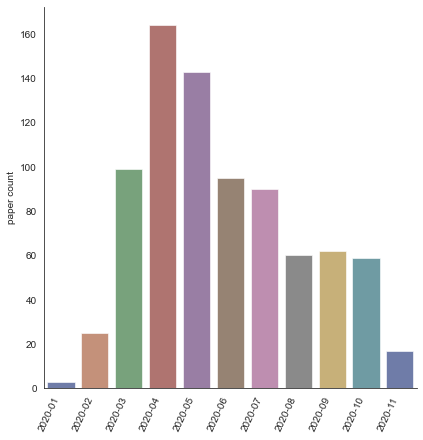

In [14]:
#visulization of the published number along the year and month from arXiv website.
arxiv_publication_month = sns.catplot(
    data=arxiv_df_gp, kind="bar",
    x="Year_Month", y="title",
    ci=None, palette="dark", alpha=.6, height=6, order=["2020-01", "2020-02", "2020-03", "2020-04", "2020-05","2020-06","2020-07","2020-08","2020-09",
                                                       "2020-10", "2020-11"])

plt.ylabel("paper count")
plt.xlabel("")

#rotate x ticks
for axes in arxiv_publication_month.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=65, horizontalalignment='right') # rotation x axis ticks referenced from website https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib 
    

# 4. scraping data from bioRxiv and medRxiv

bioRxiv and medRxiv shared the same search engine. use requests package to scrop data from bioRxiv can include the data from medRxiv as well

In [15]:
import json

In [16]:
import requests

In [17]:
#reference based on the bioRxiv COVID-19 API instruction
bioresponse = requests.get( 'https://api.biorxiv.org/covid19/0')
total_count = bioresponse.json()['messages'][0]['total']
author_number = bioresponse.json()['collection'][0]['rel_num_authors']
print(total_count)
print(type(author_number))

10577
<class 'int'>


In [18]:
#check the how the returned json file looks like
bioresponse.json()

{'messages': [{'status': 'ok', 'cursor': 0, 'count': 30, 'total': 10577}],
 'collection': [{'rel_doi': '10.1101/2020.11.12.20230318',
   'rel_title': 'The implementation of remote home monitoring models during the COVID-19 pandemic in England',
   'rel_date': '2020-11-15',
   'rel_site': 'medRxiv',
   'rel_link': 'https://medrxiv.org/cgi/content/short/2020.11.12.20230318',
   'rel_abs': 'Objective: There is a paucity of evidence for the implementation of remote home monitoring for COVID-19 infection. The aims of this study were to: identify the key characteristics of remote home monitoring models for COVID-19 infection, explore the experiences of staff implementing these models, understand the use of data for monitoring progress against outcomes, and document variability in staffing and resource allocation. Methods: This was a multi-site mixed methods study that combined qualitative and quantitative approaches to analyse the implementation and impact of remote home monitoring models du

In [19]:
#scraping data from bioXiv by using loop
#this step may take 5 minutes!!!!!!!
#please get a cofe, and take a rest. 

title_list1 = []
author_list1 = []
author_inst1 = []
publishdate_list1 = []
paper_abs1 = []
paper_id1 = []

for j in range(0, total_count, 30):
    bioresponse2 = requests.get( 'https://api.biorxiv.org/covid19/%d' %j)
    try:    
        for i in range(30):
            
            title_list1.append(bioresponse2.json()['collection'][i]['rel_title'])
            publishdate_list1.append(bioresponse2.json()['collection'][i]['rel_date'])
            paper_id1.append(bioresponse2.json()['collection'][i]['rel_doi'])
            paper_abs1.append(bioresponse2.json()['collection'][i]['rel_abs'])
            
            author_inst = []
            author_list = []
            for k in range(bioresponse2.json()['collection'][i]['rel_num_authors']):
                author_list.append(bioresponse2.json()['collection'][i]['rel_authors'][k]['author_name'])
                author_inst.append(bioresponse2.json()['collection'][i]['rel_authors'][k]['author_inst'])
            
            author_list1.append(author_list)
            author_inst1.append(author_inst)
            
            
    except Exception:
        print("scroping finished")
#         for i in range(add_total_count):
#             list.append(bioresponse2.json()['collection'][i]['rel_doi'])    
# title_list1

scroping finished


In [20]:
#build the dataframe for data scrapped from bioRxiv and medRxiv

biomed = {'title' : title_list1, 
         'author': author_list1,
          'author_inst': author_inst1, 
         'published_date':publishdate_list1, 
         'abstract': paper_abs1, 
         'paper_id': paper_id1}
biomed_df= pd.DataFrame(data=biomed)

In [21]:
biomed_df.head()

,title,author,author_inst,published_date,abstract,paper_id
0,The implementation of remote home monitoring m...,"[Cecilia Vindrola-Padros, Manbinder Sidhu, The...","[University College London, University of Birm...",2020-11-15,Objective: There is a paucity of evidence for ...,10.1101/2020.11.12.20230318
1,Rapid feedback on hospital onset SARS-CoV-2 in...,"[Oliver T Stirrup, Joseph Hughes, Matthew Park...","[University College London, MRC-University of ...",2020-11-15,Background: Rapid identification and investiga...,10.1101/2020.11.12.20230326
2,Modelling the positive testing rate of COVID-1...,"[Olajumoke Evangelina Owokotomo, Samue Manda, ...","[Data Science Institute, Center for Statistics...",2020-11-15,The current outbreak of COVID-19 is a major pa...,10.1101/2020.11.11.20230250
3,Asymptomatic and symptomatic SARS-CoV-2 infect...,"[Jérémy Dufloo, Ludivine Grzelak, Isabelle Sta...","[Institut Pasteur, Institut Pasteur, Institut ...",2020-11-15,A large proportion of SARS-CoV-2 infected indi...,10.1101/2020.11.12.20230508
4,SARS-CoV-2: Proof of recombination between str...,"[Dania Haddad, Sumi Elsa John, Anwar Mohammad,...","[Dasman Diabetes Institute, Dasman Diabetes In...",2020-11-15,COVID-19 is challenging healthcare preparednes...,10.1101/2020.11.11.20229765


# 5. Date cleaning up for the data from bioRxiv and medRxiv

In [22]:
biomed_df['publication_date'] = pd.to_datetime(biomed_df['published_date'].astype('str'), 
                                             errors="coerce")

biomed_df['Year']=biomed_df['publication_date'].dt.strftime('%Y')
biomed_df['Month']=biomed_df['publication_date'].dt.strftime('%m')
biomed_df['Day']=biomed_df['publication_date'].dt.strftime('%d')
biomed_df['hour']=biomed_df['publication_date'].dt.strftime('%H')
biomed_df['Year_Month']=biomed_df['publication_date'].dt.strftime('%Y-%m')
biomed_df['rel_site']='bio_medXiv'

In [23]:
#check the publication time to filter out the unrelated paper

biomed_df_gp = biomed_df.groupby(['Year_Month'], as_index = False)['title'].count()
biomed_df_gp

,Year_Month,title
0,2019-09,1
1,2020-01,38
2,2020-02,284
3,2020-03,717
4,2020-04,1472
5,2020-05,1957
6,2020-06,1482
7,2020-07,1223
8,2020-08,1000
9,2020-09,1049


In [24]:
#filter out the paper published before 2020
biomed_df = biomed_df.loc[biomed_df['Year'] >= '2020']

In [25]:
#double check the filtered data
biomed_df_gp = biomed_df.groupby(['Year_Month'], as_index = False)['title'].count()
biomed_df_gp

,Year_Month,title
0,2020-01,38
1,2020-02,284
2,2020-03,717
3,2020-04,1472
4,2020-05,1957
5,2020-06,1482
6,2020-07,1223
7,2020-08,1000
8,2020-09,1049
9,2020-10,871


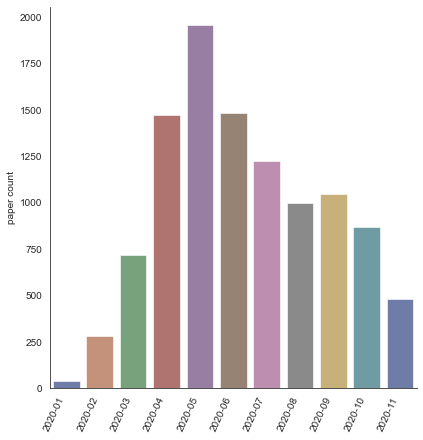

In [26]:
#visulization of the published number along the year and month from bioXiv and medRxiv website.

biomed_publication_month = sns.catplot(
    data=biomed_df_gp, kind="bar",
    x="Year_Month", y="title",
    ci=None, palette="dark", alpha=.6, height=6, order=["2020-01", "2020-02", "2020-03", "2020-04", "2020-05","2020-06","2020-07","2020-08","2020-09",
                                                       "2020-10", "2020-11"])

plt.ylabel("paper count")
plt.xlabel("")

#rotate x ticks
for axes in biomed_publication_month.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=65, horizontalalignment='right') # rotation x axis ticks referenced from website https://www.drawingfrom

In [27]:
#combine the data from arXiv, bioRxiv and medRxiv to build the preprint paper data

preprint_df = pd.concat([biomed_df, arxiv_df], ignore_index=True)

In [28]:
preprint_df.shape

(11393, 13)

In [29]:
#filter out the paper before 2020
preprint_df = preprint_df.loc[preprint_df['Year'] >='2020']
preprint_df.shape

(11393, 13)

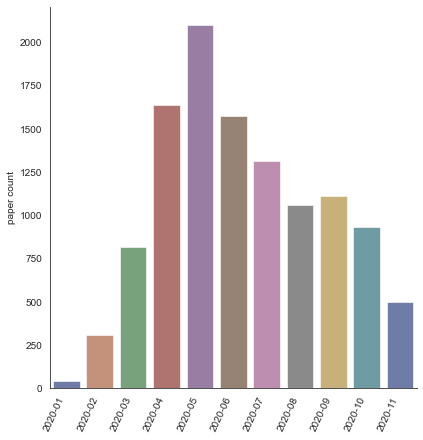

In [30]:
##visulization of the published number along the year and month from bioXiv and medRxiv website.

preprint_df_group = preprint_df.groupby(['Year_Month'], as_index=False)['title'].count()

preprint_publication_month = sns.catplot(
    data=preprint_df_group, kind="bar",
    x="Year_Month", y="title",
    ci=None, palette="dark", alpha=.6, height=6) 

plt.ylabel("paper count")
plt.xlabel("")

#rotate x ticks
for axes in preprint_publication_month.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=65, horizontalalignment='right') 
    # rotation x axis ticks referenced from website https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib 
    

# 6. Loading peer-viewed paper data

These data is from CORD19 website, with about 6GB size. In order to avoid the slow-down of this notebook, I split this data set, and put it into my github. The data is now directly loading to this notebook with much fast speed. 

In [31]:
peer_review_1 = pd.read_csv('https://raw.githubusercontent.com/yestmd/UMBC/d2119a3f44751a37995a2ff51a9d12e415c9e208/file_1.csv', error_bad_lines=False)
peer_review_2 = pd.read_csv('https://raw.githubusercontent.com/yestmd/UMBC/d2119a3f44751a37995a2ff51a9d12e415c9e208/file_2.csv', error_bad_lines=False)
peer_review_3 = pd.read_csv('https://raw.githubusercontent.com/yestmd/UMBC/d2119a3f44751a37995a2ff51a9d12e415c9e208/file_3.csv', error_bad_lines=False)
peer_review_4 = pd.read_csv('https://raw.githubusercontent.com/yestmd/UMBC/d2119a3f44751a37995a2ff51a9d12e415c9e208/file_4.csv', error_bad_lines=False)
peer_review_5 = pd.read_csv('https://raw.githubusercontent.com/yestmd/UMBC/d2119a3f44751a37995a2ff51a9d12e415c9e208/file_5.csv', error_bad_lines=False)
peer_review_6 = pd.read_csv('https://raw.githubusercontent.com/yestmd/UMBC/d2119a3f44751a37995a2ff51a9d12e415c9e208/file_6.csv', error_bad_lines=False)
peer_review_7 = pd.read_csv('https://raw.githubusercontent.com/yestmd/UMBC/d2119a3f44751a37995a2ff51a9d12e415c9e208/file_7.csv', error_bad_lines=False)

In [32]:
peer_reviewed_paper=pd.concat([peer_review_1,
                              peer_review_2,
                              peer_review_3,
                              peer_review_4,
                              peer_review_5,
                              peer_review_6,
                              peer_review_7], ignore_index=True)
peer_reviewed_paper.shape

(341042, 6)

In [33]:
preprint_df.head(2)

,title,author,author_inst,published_date,abstract,paper_id,publication_date,Year,Month,Day,hour,Year_Month,rel_site
0,The implementation of remote home monitoring m...,"[Cecilia Vindrola-Padros, Manbinder Sidhu, The...","[University College London, University of Birm...",2020-11-15,Objective: There is a paucity of evidence for ...,10.1101/2020.11.12.20230318,2020-11-15 00:00:00,2020,11,15,00,2020-11,bio_medXiv
1,Rapid feedback on hospital onset SARS-CoV-2 in...,"[Oliver T Stirrup, Joseph Hughes, Matthew Park...","[University College London, MRC-University of ...",2020-11-15,Background: Rapid identification and investiga...,10.1101/2020.11.12.20230326,2020-11-15 00:00:00,2020,11,15,00,2020-11,bio_medXiv


In [34]:
#change the column name of peer reviewed paper to match the pre print dataframe
peer_reviewed_paper=peer_reviewed_paper.rename(columns = {'source_x': 'rel_site' })
peer_reviewed_paper=peer_reviewed_paper.rename(columns = {'publish_time': 'publication_date' })
peer_reviewed_paper=peer_reviewed_paper.rename(columns = {'authors': 'author' })

In [35]:
#general check the peer reviewed paper dataframe
peer_reviewed_paper.head(2)

,Unnamed: 0,Unnamed: 0.1,rel_site,title,publication_date,author
0,0,0,reviewed_paper,Computer Vision Toolkit for Non-invasive Monit...,12/31/2020,"Deshpande, Aditya M.; Telikicherla, Anil Kumar..."
1,1,1,reviewed_paper,One-Shot Recognition of Manufacturing Defects ...,12/31/2020,"Deshpande, Aditya M.; Minai, Ali A.; Kumar, Ma..."


# 7. peer-reviewed-paper data cleaning up

In [36]:
#remove non needed columns
peer_reviewed_paper = peer_reviewed_paper.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
peer_reviewed_paper.shape

(341042, 4)

In [37]:
peer_reviewed_paper.loc[:,'title'] = peer_reviewed_paper.loc[:,'title'].astype('string')
peer_reviewed_paper.shape

(341042, 4)

In [38]:
#filter out any NaN rows
peer_reviewed_paper = peer_reviewed_paper.dropna()
peer_reviewed_paper.shape
peer_reviewed_paper.isnull().values.any()

False

In [39]:
#filter out the paper is not published at 2020
peer_review_filtered = peer_reviewed_paper[peer_reviewed_paper['publication_date'].str.contains('2020', na=False)]
peer_review_filtered.shape

(152000, 4)

In [40]:
#filter out the duplicated rows
peer_review_filtered = peer_review_filtered.drop_duplicates(subset = 'title', keep='first')
peer_review_filtered.shape

(137086, 4)

In [41]:
preprint_reset = preprint_df.reset_index(drop=True)

In [42]:
peer_review_reset = peer_review_filtered.reset_index(drop=True)

# 8. Using merge on "title" column for exactly matching

In [43]:
find_exact_match = pd.merge(preprint_reset, peer_review_reset, on='title', how="outer", indicator = True)

In [44]:
find_exact_match.head()

,title,author_x,author_inst,published_date,abstract,paper_id,publication_date_x,Year,Month,Day,hour,Year_Month,rel_site_x,rel_site_y,publication_date_y,author_y,_merge
0,The implementation of remote home monitoring m...,"[Cecilia Vindrola-Padros, Manbinder Sidhu, The...","[University College London, University of Birm...",2020-11-15,Objective: There is a paucity of evidence for ...,10.1101/2020.11.12.20230318,2020-11-15 00:00:00,2020,11,15,00,2020-11,bio_medXiv,NaN,NaN,NaN,left_only
1,Rapid feedback on hospital onset SARS-CoV-2 in...,"[Oliver T Stirrup, Joseph Hughes, Matthew Park...","[University College London, MRC-University of ...",2020-11-15,Background: Rapid identification and investiga...,10.1101/2020.11.12.20230326,2020-11-15 00:00:00,2020,11,15,00,2020-11,bio_medXiv,NaN,NaN,NaN,left_only
2,Modelling the positive testing rate of COVID-1...,"[Olajumoke Evangelina Owokotomo, Samue Manda, ...","[Data Science Institute, Center for Statistics...",2020-11-15,The current outbreak of COVID-19 is a major pa...,10.1101/2020.11.11.20230250,2020-11-15 00:00:00,2020,11,15,00,2020-11,bio_medXiv,NaN,NaN,NaN,left_only
3,Asymptomatic and symptomatic SARS-CoV-2 infect...,"[Jérémy Dufloo, Ludivine Grzelak, Isabelle Sta...","[Institut Pasteur, Institut Pasteur, Institut ...",2020-11-15,A large proportion of SARS-CoV-2 infected indi...,10.1101/2020.11.12.20230508,2020-11-15 00:00:00,2020,11,15,00,2020-11,bio_medXiv,NaN,NaN,NaN,left_only
4,SARS-CoV-2: Proof of recombination between str...,"[Dania Haddad, Sumi Elsa John, Anwar Mohammad,...","[Dasman Diabetes Institute, Dasman Diabetes In...",2020-11-15,COVID-19 is challenging healthcare preparednes...,10.1101/2020.11.11.20229765,2020-11-15 00:00:00,2020,11,15,00,2020-11,bio_medXiv,NaN,NaN,NaN,left_only


In [45]:
#check the matched title number
exact_match_result = find_exact_match.groupby(by='_merge', as_index=False).count()
exact_match_result

,_merge,title,author_x,author_inst,published_date,abstract,paper_id,publication_date_x,Year,Month,Day,hour,Year_Month,rel_site_x,rel_site_y,publication_date_y,author_y
0,left_only,1750,1750,1032,1750,1750,1750,1750,1750,1750,1750,1750,1750,1750,0,0,0
1,right_only,127493,0,0,0,0,0,0,0,0,0,0,0,0,127493,127493,127493
2,both,9643,9643,9544,9643,9643,9643,9643,9643,9643,9643,9643,9643,9643,9643,9643,9643


# 9. Focus on the unmatched paper title, do fuzzy matching for these paper
# to find any other potential matching

In [46]:
preprint_left=find_exact_match[find_exact_match['_merge'] == 'left_only'].copy()
peer_review_left=find_exact_match[find_exact_match['_merge'] == 'right_only'].copy()

In [47]:
!pip install fuzzy_pandas

In [48]:
import fuzzy_pandas as fpd

In [49]:
preprint_left.loc[:,'title'] = preprint_left.loc[:,'title'].astype('string')
peer_review_left.loc[:,'title'] = peer_review_left.loc[:,'title'].astype('string')

In [50]:
matches = fpd.fuzzy_merge(preprint_left.dropna(subset=['title']), peer_review_left.dropna(subset=['title']),
                          left_on=['title'],
                          right_on=['title'],
                          ignore_case=True,
                          keep='match')

In [51]:
#anther 86 paper found in the peer view paer
matches.columns=['title1', 'title2']
matches

,title1,title2
0,Potential Opportunity Of Antisense Therapy Of ...,Potential Opportunity of Antisense Therapy of ...
1,Tuning Intrinsic Disorder Predictors for Virus...,Tuning intrinsic disorder predictors for virus...
2,CLINICAL COURSE AND OUTCOME OF COVID-19 ACUTE ...,Clinical Course and Outcome of Covid-19 Acute ...
3,Abnormal Antibodies to Self-Carbohydrates in S...,Abnormal antibodies to self-carbohydrates in S...
4,"Broad-spectrum, patient-adaptable inhaled nicl...","Broad-Spectrum, Patient-Adaptable Inhaled Nicl..."
...,...,...
81,Pandemic Programming: How COVID-19 affects sof...,Pandemic programming: How COVID-19 affects sof...
82,Dual-Sampling Attention Network for Diagnosis ...,Dual-Sampling Attention Network for Diagnosis ...
83,Joint Prediction and Time Estimation of COVID-...,Joint prediction and time estimation of COVID-...
84,India nudges to contain COVID-19 pandemic: a r...,India nudges to contain COVID-19 pandemic: A r...


In [52]:
#visulization the matching result
total_preprint_paper = preprint_df['title'].count()
print("total_preprint_paper#:", total_preprint_paper)

total_peer_review_paper = peer_review_filtered['title'].count()
print("total_peer_review_paper#:",total_peer_review_paper)

fuzzy_match = matches['title1'].count() +1
print("fuzzy_match#:",fuzzy_match)

preprint_reviewed = exact_match_result.at[2, 'title'] + fuzzy_match
print("preprint_reviewed#:",preprint_reviewed)

total_preprint_paper#: 11393
total_peer_review_paper#: 137086
fuzzy_match#: 87
preprint_reviewed#: 9730


In [53]:
peer_review_rate = round((preprint_reviewed / total_preprint_paper *100),2)
un_published_rate = round((100-peer_review_rate), 2)

print("preprint paper peer-reviewed rate: " + str(peer_review_rate)+"%")
print("preprint paper UN-peer-reviewed rate: " + str(un_published_rate)+"%")


preprint paper peer-reviewed rate: 85.4%
preprint paper UN-peer-reviewed rate: 14.6%


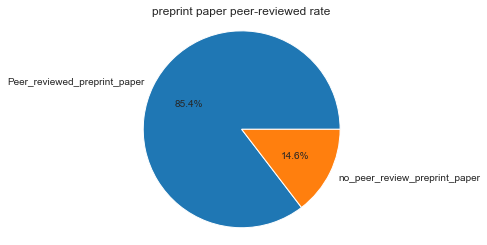

In [54]:
df = pd.DataFrame([8,8,1,2], index=['a', 'b', 'c', 'd'], columns=['x'])

data = [peer_review_rate, 100-peer_review_rate] 
my_labels = 'Peer_reviewed_preprint_paper', 'no_peer_review_preprint_paper'
plt.pie(data, labels = my_labels, autopct='%1.1f%%')  
plt.title('preprint paper peer-reviewed rate')
plt.axis('equal')
plt.show()


#pie_df.plot(kinds = 'pie', subplot=True, figsize=(8,8))

# The question of this project to ask: whether the preprint paper is reliable to treat as an important research rescources for research?
Based on the result so far, 85.4% of the prepring paper would be published in the peer-review journal in the futher, which is very high rate for these preprint paper. So my answer for this question is: yes, the preprint is an important research resources for COVID-19 research. 